# Importing the necessary libraries:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the csv file:

In [2]:
df=pd.read_csv('gene_expression.csv')

In [3]:
df.head()

,Gene One,Gene Two,Cancer Present
0,4.3,3.9,1
1,2.5,6.3,0
2,5.7,3.9,1
3,6.1,6.2,0
4,7.4,3.4,1


# Ploting thecomparison between (Gene One) along with (Gene Two):

<AxesSubplot:xlabel='Gene One', ylabel='Gene Two'>

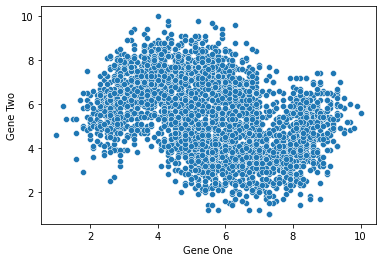

In [4]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df)

# We can zoom In:

(4.0, 8.0)

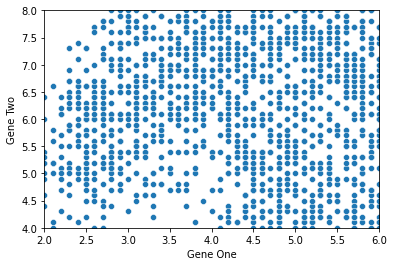

In [5]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df)
plt.xlim(2,6)
plt.ylim(4,8)

# If we add style to the zoomed graph:

(4.0, 8.0)

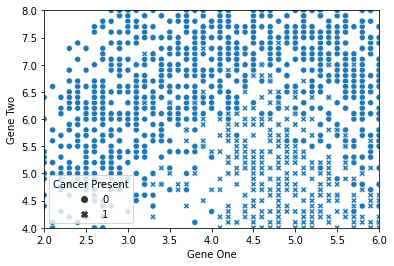

In [6]:
sns.scatterplot(x='Gene One',y='Gene Two',data=df,style='Cancer Present')
plt.xlim(2,6)
plt.ylim(4,8)

# To check the length of df:

In [7]:
len(df)

3000

# To pair plot with hue of (Cancer Present) column:

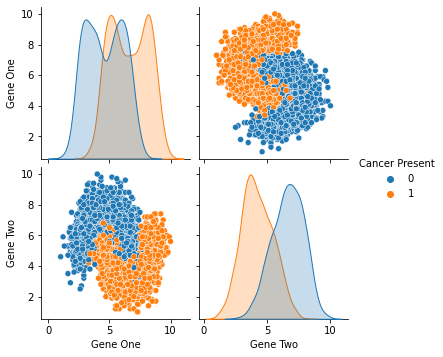

In [8]:
sns.pairplot(data=df,hue='Cancer Present')

# Importing the train_test_split library:

In [9]:
from sklearn.model_selection import train_test_split

# Importing the StandardScaler library:

In [10]:
from sklearn.preprocessing import StandardScaler

# Creating X & y values:

In [11]:
X=df.drop('Cancer Present',axis=1)
y=df['Cancer Present']

#  Now splitting X & y values

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=101)

# Creating the object:

In [13]:
scaler=StandardScaler()

# Then fitting & scaling the scaler object with (X_train):

In [14]:
scaled_X_train=scaler.fit_transform(X_train)

# Then transform only the (X_test):

In [15]:
scaled_X_test=scaler.transform(X_test)

# Now let's import the KNeighborsClassifier library:

In [16]:
from sklearn.neighbors import KNeighborsClassifier

# Creating the object:

In [17]:
knn_model=KNeighborsClassifier(n_neighbors=1)

# Fitting the knn_model:

In [18]:
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

# Then predict the scaled_X_test:

In [19]:
y_pred=knn_model.predict(scaled_X_test)

# Now let's import the metrics libraries:

In [20]:
from sklearn.metrics import confusion_matrix,classification_report

# Let's try the confusion_matrix metric:

In [21]:
confusion_matrix(y_test,y_pred)

array([[382,  41],
       [ 31, 446]], dtype=int64)

# For getting the length of y_test:

In [22]:
len(y_test)

900

# Now let's try the classification_report metric:

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.90      0.91       423
           1       0.92      0.94      0.93       477

    accuracy                           0.92       900
   macro avg       0.92      0.92      0.92       900
weighted avg       0.92      0.92      0.92       900

